# MINERÍA DE TEXTOS

## Alumna: Jessica Sarahi Méndez Rincón


###  Proyecto Análisis de Sentimientos y Polaridad en Tweets
###  Tema: COVID-19

## Contexto:
    
    El año 2020 se vio afectado por el impacto a la sociedad mundial sobre una gripe de alto nivel de contagio así como la causa principal de fallecimientos alrededor del Mundo.
    
    México no ha sido exento del raro virus.
    
    Con el presente Proyecto, el objetivo primordial es desarrollar los algoritmos que ayuden a monitorizar el efecto en los comentarios que en la Red Social de Twitter se emiten, y que ayudé a dar una idea del estado de ánimo de la gente.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQUpnfdhCKN1C3OIbNrDdyjctlRsA9t6386WWD8JkUzt_X7JiuH&usqp=CAU" alt="Alt text that describes the graphic" title="Title text" />

In [1]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
#Tienes que descargarte las stopwords primero via nltk.download()
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
from nltk.data import load
from nltk.stem import SnowballStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict 
from sklearn import model_selection, naive_bayes, svm




In [2]:
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))


## Preparar los datos


In [3]:
# Importacion del archivo que se nos proporciono agregandole cabeceras que no contiene
names = ['Id', 'tweet', 'polaridad']
dataset = pd.read_csv('train.txt', sep='\t',names=names)

In [4]:
dataset.head()

,Id,tweet,polaridad
0,818942405281980417,No mames este pinche dolor que pedo? ya mejor ...,N
1,818963123646373892,"@leomall2018 Según yo era como aviso, pero aho...",NEU
2,818998133694697472,@benshorts a juzgar por mis comportamientos au...,N
3,818822556090105857,#BuenosDias mundo Twittero ya desperté y estoy...,P
4,818993011514372098,No pude resolver el rompecabezas en Los rios d...,N


In [5]:
df=pd.DataFrame(dataset)


X = dataset.iloc[:, 1].values
Y = dataset.iloc[:, 2].values

dX=pd.DataFrame(X)  
dX.columns = ['tweet']
dX.head(5)




,tweet
0,No mames este pinche dolor que pedo? ya mejor ...
1,"@leomall2018 Según yo era como aviso, pero aho..."
2,@benshorts a juzgar por mis comportamientos au...
3,#BuenosDias mundo Twittero ya desperté y estoy...
4,No pude resolver el rompecabezas en Los rios d...


In [6]:

dY=pd.DataFrame(Y)  
dY.columns = ['polaridad']
dY.head(5)

,polaridad
0,N
1,NEU
2,N
3,P
4,N


In [7]:
dY['polaridad'].unique()

array(['N', 'NEU', 'P'], dtype=object)

## Tokenización, Normalización en minúsculas, StopWords, Stemming y Vectorización

In [8]:
df['tweet'] = [entry.lower() for entry in df['tweet']]

In [9]:

# Paso - 1c: Tokenización: en este cada entrada en el corpus se dividirá en un conjunto de palabras
df['tweet']= [word_tokenize(entry) for entry in df['tweet']]

# Paso - 1d: Eliminar palabras de detención, no numéricas y realizar el vástago / lemmenting de palabras.
# WordNetLemmatizer requiere etiquetas Pos para comprender si la palabra es sustantivo o verbo o adjetivo, etc. 
# De manera predeterminada, está configurada como Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['tweet']):
     # Declarar la lista vacía para almacenar las palabras que siguen las reglas de este paso
    Final_words = []
    # Inicializando WordNetLemmatizer ()
    word_Lemmatized = WordNetLemmatizer()
    # La función pos_tag a continuación proporcionará la 'etiqueta', es decir, si la palabra es Sustantivo (N) o Verbo (V) u otra cosa.
    for word, tag in pos_tag(entry):
        # La siguiente condición es verificar las palabras Stop y considerar solo alfabetos
        if word not in stopwords.words('spanish') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # El conjunto final procesado de palabras para cada iteración se almacenará en 'text_final'
    df.loc[index,'tweet_final'] = str(Final_words)
print(df.loc[index,'tweet_final'])

['djrossana', 'lindo', 'martes', 'sueños', 'hagan', 'realidad', 'sé', 'misma', 'copy', 'modas', 'ejemplo', 'seguir']


In [10]:
df.head(5)

,Id,tweet,polaridad,tweet_final
0,818942405281980417,"[no, mames, este, pinche, dolor, que, pedo, ?,...",N,"['mames', 'pinche', 'dolor', 'pedo', 'mejor', ..."
1,818963123646373892,"[@, leomall2018, según, yo, era, como, aviso, ...",NEU,"['según', 'aviso', 'ahora', 'oficial']"
2,818998133694697472,"[@, benshorts, a, juzgar, por, mis, comportami...",N,"['benshorts', 'juzgar', 'comportamientos', 'au..."
3,818822556090105857,"[#, buenosdias, mundo, twittero, ya, desperté,...",P,"['buenosdias', 'mundo', 'twittero', 'desperté'..."
4,818993011514372098,"[no, pude, resolver, el, rompecabezas, en, los...",N,"['pude', 'resolver', 'rompecabezas', 'rio', 'a..."


## Datos de Entrenamiento y Pruebas

In [11]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['tweet_final'],df['polaridad'],test_size=0.3)

In [12]:
Train_Y.head(5)

109    N
273    N
263    N
422    N
773    N
Name: polaridad, dtype: object

In [13]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [14]:
print(Train_Y)

[0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 1 0 0 2 2 2 0 0 2 0 2 0 1 0 0 0 2 1 0 1
 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 2 0 2 2 0 0 2 2 1 2 1 2 0 2 0 1 0 0 0 0 0
 0 2 1 2 0 2 0 0 1 2 0 0 2 1 0 0 2 0 2 0 1 0 2 2 1 2 0 2 0 1 1 0 1 1 0 1 2
 0 0 0 0 1 2 1 2 2 0 0 2 0 0 0 1 2 1 1 1 0 2 0 2 2 2 2 2 0 1 0 1 2 0 1 0 0
 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 1 2 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 2 1 1 0 0 0 2 0 2 0 2 2 0 0 2 1 0 1 2 2 2 1 2 0 0 1 0 2 1 1 2 1 0 2
 2 0 0 1 0 1 0 0 2 0 1 0 0 0 0 2 0 0 2 0 0 1 2 0 0 0 0 0 0 2 0 0 2 0 0 0 2
 1 0 0 0 0 1 0 0 0 0 2 2 0 0 0 0 1 0 1 0 0 2 2 2 2 1 1 0 0 2 1 0 2 0 0 2 0
 0 0 2 0 0 0 2 2 0 1 0 2 2 2 0 2 2 0 0 0 0 0 2 2 0 0 1 2 2 0 2 1 2 0 2 0 2
 0 1 2 2 0 0 1 2 2 0 0 0 0 0 1 2 1 0 1 2 2 2 1 1 1 0 2 0 0 2 2 1 2 2 2 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 2 0 2 0 2 0 0 2 0 2 0 0 1 1 0 2 1 0 2 0 2
 1 0 2 0 0 2 1 2 0 0 2 2 0 0 0 0 1 2 0 0 2 2 0 2 0 0 0 2 1 1 0 2 0 0 2 0 2
 1 0 0 2 1 0 0 1 0 0 2 0 0 1 0 2 2 1 2 0 0 2 1 0 2 2 1 0 1 0 0 1 1 2 2 2 0
 0 1 0 0 0 2 1 0 2 2 0 0 

In [15]:
df.head()

,Id,tweet,polaridad,tweet_final
0,818942405281980417,"[no, mames, este, pinche, dolor, que, pedo, ?,...",N,"['mames', 'pinche', 'dolor', 'pedo', 'mejor', ..."
1,818963123646373892,"[@, leomall2018, según, yo, era, como, aviso, ...",NEU,"['según', 'aviso', 'ahora', 'oficial']"
2,818998133694697472,"[@, benshorts, a, juzgar, por, mis, comportami...",N,"['benshorts', 'juzgar', 'comportamientos', 'au..."
3,818822556090105857,"[#, buenosdias, mundo, twittero, ya, desperté,...",P,"['buenosdias', 'mundo', 'twittero', 'desperté'..."
4,818993011514372098,"[no, pude, resolver, el, rompecabezas, en, los...",N,"['pude', 'resolver', 'rompecabezas', 'rio', 'a..."


In [16]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['tweet_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

## Identificación de Polaridad con  Algoritmos de Aprendizaje Supervisado

In [17]:
# Clasificador - Algoritmo - Naive Bayes
# Se ajusta el conjunto de datos de entrenamiento en el clasificador
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# Predecir las etiquetas en el conjunto de datos de validación
predictions_NB = Naive.predict(Test_X_Tfidf)
# Usando la función de precision_score para obtener la precisión
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  60.26936026936027


In [18]:
# Clasificador - Algoritmo - SVM
# Se ajusta el conjunto de datos de entrenamiento en el clasificador
SVM = svm.SVC(C=1.20, kernel='linear', degree=3, gamma='auto',   max_iter=1000,  tol=0.0001)
SVM.fit(Train_X_Tfidf,Train_Y)
# predecir las etiquetas en el conjunto de datos de validación
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Usando la función precision_score para obtener la precisión
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
 

SVM Accuracy Score ->  63.97306397306397


c:\users\jess\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [19]:
print(SVM)

SVC(C=1.2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=1000, probability=False, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)


In [20]:
# Prediccion del conjunto de prueba de acuerdo al 30% para los entrenamientos 120 registros
y_pred = SVM.predict(Test_X_Tfidf)

In [21]:
print(Test_Y)

[0 0 2 0 2 2 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 1 0 0 2 2 2 2 2 0 0 0 0 2 1 2 2
 2 2 2 0 2 0 0 2 1 0 2 1 1 1 2 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 2 0 2 0 2 0 2
 0 0 2 2 1 1 1 0 0 0 0 2 0 0 1 0 2 2 0 0 2 1 2 2 2 1 2 2 0 0 0 0 0 0 0 0 2
 0 1 1 1 0 2 0 2 1 1 0 1 1 0 2 2 2 0 0 2 2 2 0 2 0 0 0 2 0 0 2 0 0 0 0 1 0
 1 0 0 0 2 0 0 2 0 0 0 1 1 2 1 0 0 2 0 2 0 2 2 0 1 0 0 2 2 0 2 0 0 0 2 0 1
 2 0 2 1 1 2 0 0 1 1 0 0 0 2 0 1 2 0 0 0 1 2 2 0 2 2 0 2 1 2 0 0 0 2 2 0 0
 1 0 2 1 2 2 0 2 0 0 0 0 2 2 2 2 1 2 2 0 1 0 0 2 1 2 0 0 0 0 0 0 1 0 0 0 0
 2 0 0 2 0 0 0 2 1 1 0 2 0 2 0 0 0 2 0 0 0 2 0 2 2 1 1 0 0 0 2 0 0 1 1 0 0
 2]


In [22]:
print(y_pred)

[0 0 2 0 2 1 0 0 0 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 1 0 0 0 2 0 0 0 2 0
 2 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2 0 2 0 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 0 0 2 0 1 2 0 0 0 0 0 0 0 2 2 0 2 0 0 0 2 2 0 2 0 0 0 0 0 0
 0 2 0 0 0 0 0 2 0 0 0 0 2 0 2 2 0 2 0 0 2 2 2 2 0 0 0 2 0 0 2 0 0 0 0 2 0
 0 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0 2 0 2 1 2 0 0 2 2 2 0 0
 2 0 2 0 2 0 0 2 0 0 2 0 0 2 2 2 1 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 2 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 1 2 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2
 2]


In [23]:
# Matriz de confusion
cm = confusion_matrix(Test_Y, y_pred, labels=[0, 1, 2])
cm 

array([[132,   1,  21],
       [ 32,   3,  11],
       [ 40,   2,  55]], dtype=int64)

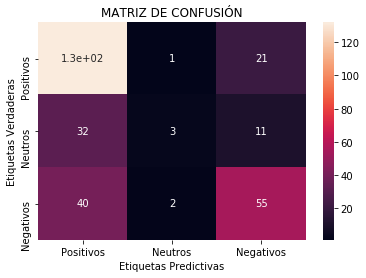

In [24]:

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# Etiquetas, Título and medidas
ax.set_xlabel('Etiquetas Predictivas');ax.set_ylabel('Etiquetas Verdaderas'); 
ax.set_title('MATRIZ DE CONFUSIÓN'); 
ax.xaxis.set_ticklabels(['Positivos', 'Neutros','Negativos']); ax.yaxis.set_ticklabels(['Positivos', 'Neutros','Negativos']);

In [26]:
names = ['Id', 'tweet', 'polaridad']
df_prediccion = pd.read_csv('dev.txt', sep='\t',names=names)

In [27]:
df_prediccion.head(5)

,Id,tweet,polaridad
0,815059714492878848,Inteligente respuesta de Putin,P
1,819399527715192833,@FridaCoral ven a chetu mejor,NEU
2,819383868704759808,Danniel es como mi amor frustrado,N
3,819320272423526400,#EsDeMexicanos dejar todo para el último día.,N
4,819389873035608064,"Estoy aprendiendo a hacer lo mismo, pero difer...",P


In [30]:
df_prediccion['tweet'] = [entry.lower() for entry in df_prediccion['tweet']]
# Paso - 1c: Tokenización: en este cada entrada en el corpus se dividirá en un conjunto de palabras
df_prediccion['tweet']= [word_tokenize(entry) for entry in df_prediccion['tweet']]

# Paso - 1d: Eliminar palabras de detención, no numéricas y realizar el vástago / lemmenting de palabras.
# WordNetLemmatizer requiere etiquetas Pos para comprender si la palabra es sustantivo o verbo o adjetivo, etc. 
# De manera predeterminada, está configurada como Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_prediccion['tweet']):
     # Declarar la lista vacía para almacenar las palabras que siguen las reglas de este paso
    Final_words = []
    # Inicializando WordNetLemmatizer ()
    word_Lemmatized = WordNetLemmatizer()
    # La función pos_tag a continuación proporcionará la 'etiqueta', es decir, si la palabra es Sustantivo (N) o Verbo (V) u otra cosa.
    for word, tag in pos_tag(entry):
        # La siguiente condición es verificar las palabras Stop y considerar solo alfabetos
        if word not in stopwords.words('spanish') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # El conjunto final procesado de palabras para cada iteración se almacenará en 'text_final'
    df_prediccion.loc[index,'tweet_final'] = str(Final_words)
print(df_prediccion.loc[index,'tweet_final'])

['alado', 'vienen', 'comiendo', 'pan', 'enfrente', 'pobres']


In [31]:
df_prediccion.head(5)

,Id,tweet,polaridad,tweet_final
0,815059714492878848,"[inteligente, respuesta, de, putin]",P,"['inteligente', 'respuesta', 'putin']"
1,819399527715192833,"[@, fridacoral, ven, a, chetu, mejor]",NEU,"['fridacoral', 'ven', 'chetu', 'mejor']"
2,819383868704759808,"[danniel, es, como, mi, amor, frustrado]",N,"['danniel', 'amor', 'frustrado']"
3,819320272423526400,"[#, esdemexicanos, dejar, todo, para, el, últi...",N,"['esdemexicanos', 'dejar', 'último', 'día']"
4,819389873035608064,"[estoy, aprendiendo, a, hacer, lo, mismo, ,, p...",P,"['aprendiendo', 'hacer', 'mismo', 'diferente']"


In [32]:
df_prediccion['polaridad_P']=  SVM.predict(Tfidf_vect.transform(df_prediccion['tweet_final']))

In [34]:
df_prediccion.head(550)

,Id,tweet,polaridad,tweet_final,polaridad_P
0,815059714492878848,"[inteligente, respuesta, de, putin]",P,"['inteligente', 'respuesta', 'putin']",0
1,819399527715192833,"[@, fridacoral, ven, a, chetu, mejor]",NEU,"['fridacoral', 'ven', 'chetu', 'mejor']",0
2,819383868704759808,"[danniel, es, como, mi, amor, frustrado]",N,"['danniel', 'amor', 'frustrado']",0
3,819320272423526400,"[#, esdemexicanos, dejar, todo, para, el, últi...",N,"['esdemexicanos', 'dejar', 'último', 'día']",0
4,819389873035608064,"[estoy, aprendiendo, a, hacer, lo, mismo, ,, p...",P,"['aprendiendo', 'hacer', 'mismo', 'diferente']",1
...,...,...,...,...,...
505,819221868574085121,"[@, natsflorees, no, todo, es, tan, malo]",NEU,"['natsflorees', 'tan', 'malo']",0
506,818686841381601280,"[@, richo_amezquita, a, ver, ,, ya, ,, no, sea...",N,"['ver', 'así']",2
507,819012309880360960,"[ocupo, el, gym, en, serio, #, videomtv2016, a...",NEU,"['ocupo', 'gym', 'serio', 'abraham', 'mateo']",0
508,819306396378275840,"[empezar, de, nuevo, con, la, dieta, es, tan, ...",N,"['empezar', 'nuevo', 'dieta', 'tan', 'difícil']",0
